# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [1]:
import requests
import json

In [2]:
URL = "http://www.reddit.com/hot.json"

In [ ]:
## YOUR CODE HERE

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/hot.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [ ]:
## YOUR CODE HERE

## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [ ]:
## YOUR CODE HERE
#from 80 choose 10 features
    #downs, num_comments, num_crossposts, num_reports, post_categories, score (aka upvotes?), view_count

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [10]:
## YOUR CODE HERE
import pickle
import pandas as pd

with open('posts1.pkl','rb') as f:
    posts = pickle.load(f)

In [97]:
posts[50]['data']

{'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': 'esbe1234',
 'author_flair_css_class': None,
 'author_flair_template_id': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'clicked': False,
 'contest_mode': False,
 'created': 1527654897.0,
 'created_utc': 1527626097.0,
 'distinguished': None,
 'domain': 'en.wikipedia.org',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '8n2gl8',
 'is_crosspostable': False,
 'is_reddit_media_domain': False,
 'is_self': False,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'media_only': False,
 'mod_note': None,
 'mod_reason_by': None,
 'mod_reason_title': None,
 'mod_reports': [],
 'name': 't3_8n2gl8',
 'no_follow': False,
 'num_comments': 804,
 'num_crossposts': 1,
 'num_reports': None,
 'over_18': False,
 

In [110]:
#47 words in post 50
print(posts[50]['data']['title'])
print(len(str(posts[50]['data']['title']).split()))
str(posts[50]['data']['title'].split())


TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them.
47


"['TIL', 'Donnie', 'Yen', '(the', 'blind', 'monk', 'in', 'Star', 'Wars:', 'Rogue', 'One/star', 'of', 'the', 'Ip', 'Man', 'films)', 'was', 'once', 'leaving', 'a', 'Hong', 'Kong', 'nightclub', 'with', 'his', 'girlfriend', 'when', 'they', 'were', 'attacked', 'by', 'a', 'gang', 'who', 'had', 'been', 'bothering', 'them', 'earlier', 'in', 'the', 'night.', 'Donnie', 'hospitalised', '8', 'of', 'them.']"

In [112]:
import numpy as np

posts_comments = []
for i in range(len(posts)):
    comments = posts[i]['data']['num_comments']
    posts_comments.append(comments)

posts_comments = np.array(posts_comments)
print(' average comments/post:', int(posts_comments.mean()),
      '\n',
      'median comments/post:', int(np.median(posts_comments)),
      '\n',
     'max comments/post:', posts_comments.max(),
      '\n',
     'min comments/post:', posts_comments.min())

 average comments/post: 1493 
 median comments/post: 461 
 max comments/post: 11274 
 min comments/post: 46


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

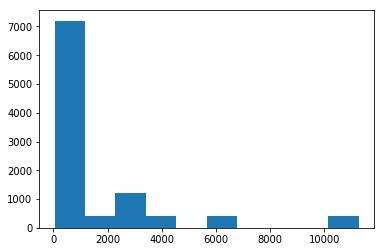

In [95]:
plt.hist(posts_comments);

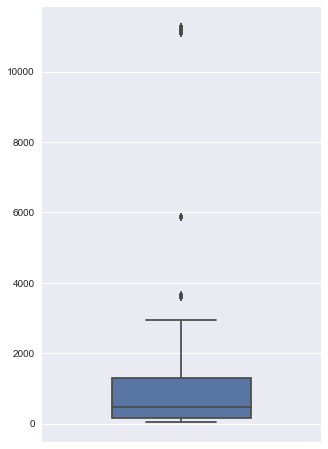

In [126]:
#from stack overflow: setting figsize
sns.set(rc={'figure.figsize':(5,8)})

sns.boxplot(posts_comments, orient = 'v', width = 0.5);

In [ ]:
df = pd.DataFrame(np.array(posts).reshape( , ), columns = list(posts[0][]))

In [54]:
print(len(posts))
type(posts)

posts[0]['data']

#pd.DataFrame(data = posts[0:5]['data'].values(), columns = posts[0]['data'].keys())

#pd.DataFrame(data = posts[0]['data'].values(), columns = posts[0]['data'].keys())
#for i in range(len(posts)):
#    print(pd.DataFrame(data = posts[i][], columns = posts[i]['data'].values()))


10000


{'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': 'esbe1234',
 'author_flair_css_class': None,
 'author_flair_template_id': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'clicked': False,
 'contest_mode': False,
 'created': 1527654897.0,
 'created_utc': 1527626097.0,
 'distinguished': None,
 'domain': 'en.wikipedia.org',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '8n2gl8',
 'is_crosspostable': False,
 'is_reddit_media_domain': False,
 'is_self': False,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'media_only': False,
 'mod_note': None,
 'mod_reason_by': None,
 'mod_reason_title': None,
 'mod_reports': [],
 'name': 't3_8n2gl8',
 'no_follow': False,
 'num_comments': 802,
 'num_crossposts': 1,
 'num_reports': None,
 'over_18': False,
 

In [ ]:
for i in range(len(posts)):
    
    #display(i, posts[i]['data']['title'])

#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [ ]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [ ]:
## YOUR CODE HERE

#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [ ]:
## YOUR CODE HERE

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [ ]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [ ]:
## YOUR CODE HERE

#### Repeat the model-building process with a non-tree-based method.

In [ ]:
## YOUR CODE HERE

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

# Executive Summary
---
Put your executive summary in a Markdown cell below.

### BONUS
Refer to the README for the bonus parts

In [ ]:
## YOUR CODE HERE